<a href="https://colab.research.google.com/github/laerteluizf/Proc_Imagens_2025_2/blob/main/Proc_Imagens_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from google.colab.patches import cv2_imshow


def adicionar_legenda(imagem, texto):
    if imagem is None:
        return None

    posicao = (10, 30)
    cor = (255, 255, 255)
    escala = 0.7
    espessura = 2
    fonte = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(imagem, texto, posicao, fonte, escala, cor, espessura, cv2.LINE_AA)

    return imagem


def adicionar_texto_no_topo(imagem, texto):
    fonte = cv2.FONT_HERSHEY_SIMPLEX
    cor = (255, 1, 255)
    escala = 1.0
    espessura = 2
    (largura_texto, altura_texto), _ = cv2.getTextSize(texto, fonte, escala, espessura)
    posicao_x = (imagem.shape[1] - largura_texto) // 2
    posicao_y = altura_texto + 15 # 15 pixels de margem do topo
    cv2.putText(imagem, texto, (posicao_x, posicao_y), fonte, escala, cor, espessura, cv2.LINE_AA)

    return imagem


def mostrar_4_imagens(imagem1, legenda1, imagem2, legenda2, imagem3, legenda3, imagem4, legenda4):
    if imagem1 is None or imagem2 is None or imagem3 is None or imagem4 is None :
        print('Erro: Não foi possível carregar a imagem.')
        print(imagem1)


    else:
        # Obtém as dimensões originais da imagem
        #imagem_gen = imagem1.copy()

        # GARANTIA DE 3 CANAIS (BGR) PARA TODAS AS IMAGES
        # Verifica se a imagem tem apenas 1 canal (escala de cinza) e a converte para 3 canais BGR
        if imagem1.ndim == 2: # .ndim == 2 significa 1 canal (altura, largura)
            imagem1 = cv2.cvtColor(imagem1, cv2.COLOR_GRAY2BGR)
        if imagem2.ndim == 2:
            imagem2 = cv2.cvtColor(imagem2, cv2.COLOR_GRAY2BGR)
        if imagem3.ndim == 2:
            imagem3 = cv2.cvtColor(imagem3, cv2.COLOR_GRAY2BGR)
        if imagem4.ndim == 2:
            imagem4 = cv2.cvtColor(imagem4, cv2.COLOR_GRAY2BGR)


        altura_maxima = 300


        imagem1_red = imutils.resize(imagem1, height = altura_maxima)
        imagem2_red = imutils.resize(imagem2, height = altura_maxima)
        imagem3_red = imutils.resize(imagem3, height = altura_maxima)
        imagem4_red = imutils.resize(imagem4, height = altura_maxima)

        #largura = imagem.shape[1]

        largura_imagem1 = imagem1_red.shape[1]
        largura_imagem2 = imagem2_red.shape[1]
        largura_imagem3 = imagem3_red.shape[1]
        largura_imagem4 = imagem4_red.shape[1]


        #imagem_red = imutils.resize(imagem_neg, height=400)



        # Adiciona legendas internas para cada sub-imagem
        posicao_legenda_interna = (10 , 30) # Posição para o canto superior esquerdo
        img1 = adicionar_legenda(imagem1_red, legenda1)
        img2 = adicionar_legenda(imagem2_red, legenda2)
        img3 = adicionar_legenda(imagem3_red, legenda3)
        img4 = adicionar_legenda(imagem4_red, legenda4)

        # Define o espaçamento
        margem = 30       # Margem nas bordas da tela final

        # Criando tela final
        largura_tela = (max(largura_imagem1, largura_imagem2, largura_imagem3, largura_imagem4) * 2) + (3 * margem)
        altura_tela = (altura_maxima * 2) + (4 * margem)

        tela_final = np.zeros((altura_tela, largura_tela, 3), dtype=np.uint8) #Tela em Preto
        #tela_final = np.ones((altura_tela, largura_tela, 3), dtype=np.uint8) * 255 #Tela em Branco

        # Calcula as posições para colar as imagens na tela
        # Offset inicial por causa da legenda externa e margem superior

        # Posições para a primeira fileira
        pos_y1 = (2 * margem) #offset_y_inicial
        #pos_x1 = margem
        pos_x1 = int(((largura_tela - margem)/ 2) - largura_imagem1)
        #pos_x2 = (2 * margem) + largura_imagem1
        pos_x2 = int((largura_tela + margem)/ 2 )

        # Posições para a segunda fileira
        pos_y2 = pos_y1 + margem + altura_maxima
        #pos_x3 = margem
        pos_x3 = int(((largura_tela - margem)/ 2) - largura_imagem1)
        #pos_x4 = (2 * margem) + largura_imagem3
        pos_x4 = int((largura_tela + margem)/ 2 )

        # Cola as imagens na tela final
        tela_final[pos_y1 : pos_y1 + altura_maxima, pos_x1 : pos_x1 + largura_imagem1] = img1
        tela_final[pos_y1 : pos_y1 + altura_maxima, pos_x2 : pos_x2 + largura_imagem2] = img2
        tela_final[pos_y2 : pos_y2 + altura_maxima, pos_x3 : pos_x3 + largura_imagem3] = img3
        tela_final[pos_y2 : pos_y2 + altura_maxima, pos_x4 : pos_x4 + largura_imagem4] = img4


        tela_final = adicionar_texto_no_topo(tela_final, 'Comparação de Imagens')

        cv2_imshow(tela_final)

        # Cria uma janela para exibir a imagem redimensionada.
        #cv2.imshow('Minha Imagem Redimensionada', imagem_redimensionada)
        #cv2.waitKey(0)  # Espera até que uma tecla seja pressionada para fechar a janela.
        #cv2.destroyAllWindows()

In [2]:
## MUITO BOM E PRONTO ##

def converte_negativo(imagem):
    if imagem is None:
        print('Erro: Não foi possível carregar a imagem.')
    else:
        imagem_neg = 255 - imagem
        #imagem_red = imutils.resize(imagem_neg, height=400)

        #cv2.imshow('imagem Negantivo', imagem_red)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        return imagem_neg


def histograma(imagem):
    if imagem is None:
        print('Erro: Não foi possível carregar a imagem.')
        return
    else:
        # Criação do histograma
        histo = np.zeros(256, dtype=int)
        altura_original, largura_original = imagem.shape
        for y in range(altura_original):
            for x in range(largura_original):
                valorint = imagem[y, x]
                histo[valorint] = histo[valorint] + 1

        # Parte para plotar o histograma e converter para OpenCV ---

        # Cria a figura e o gráfico com Matplotlib
        fig = plt.figure(figsize=(10, 5))
        plt.bar(range(256), histo, color='gray', width=1)
        plt.title("Histograma da Imagem")
        plt.xlabel("Nível de Cinza")
        plt.ylabel("Número de Pixels")
        plt.xlim([0, 256])

        # Renderiza o gráfico e obtém os dados do buffer
        fig.canvas.draw()

        # Usa buffer_rgba() para obter o array de pixels do gráfico
        imagem_plot_rgba = np.asarray(fig.canvas.buffer_rgba())

        # Fecha a figura do Matplotlib
        plt.close(fig)

        # Converte a ordem das cores de RGBA para BGR (OpenCV) e remove o canal alfa
        imagem_plot = cv2.cvtColor(imagem_plot_rgba, cv2.COLOR_RGBA2BGR)

        return imagem_plot



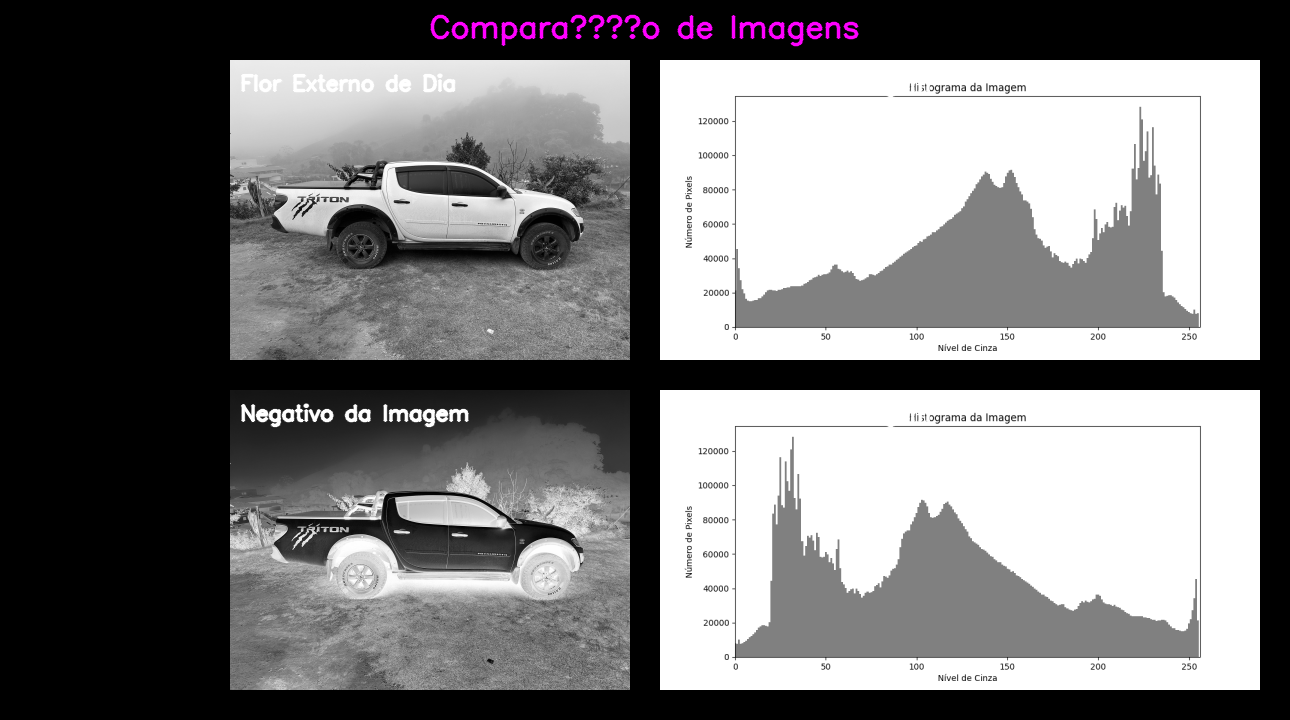

In [5]:
#caminho_img1 = 'C:/Users/Laerte/Desktop/Proc de Imagens/carro_o_d_5.jpeg'
#caminho_img2 = 'C:/Users/Laerte/Desktop/Proc de Imagens/flor_i_d_5.jpeg'
caminho_img1 = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/carro_i_d_5.jpeg'
caminho_img2 = '/content/drive/MyDrive/Proc de Imagens 2025 2/Imagem Cinza/carro_i_d_5.jpeg'
#caminho_img3 = 'C:/Users/Laerte/Desktop/Proc de Imagens/flor_o_d_5.jpeg'
#caminho_img4 = 'C:/Users/Laerte/Desktop/Proc de Imagens/flor_o_d_5.jpeg'


#img1 = cv2.imread(caminho_img1, cv2.IMREAD_COLOR)

img1 = cv2.imread(caminho_img1, 0)
legenda1 = 'Flor Externo de Dia'
img2 = histograma(img1)
legenda2 = 'Histograma da Imagem'
img3 = converte_negativo(img1)
legenda3 = 'Negativo da Imagem'
img4 = histograma(img3)
legenda4 = 'Histograma da Imagem'


#img2 = cv2.imread(caminho_img2, cv2.IMREAD_COLOR)
#legenda2 = 'Carro Externo Noite'
#img3 = cv2.imread(caminho_img3, cv2.IMREAD_COLOR)
#legenda3 = 'Carro interno Dia'
#img4 = cv2.imread(caminho_img4, cv2.IMREAD_COLOR)
#legenda4 = 'Carro interno Noite'

mostrar_4_imagens(img1, legenda1, img2, legenda2, img3, legenda3, img4, legenda4)
